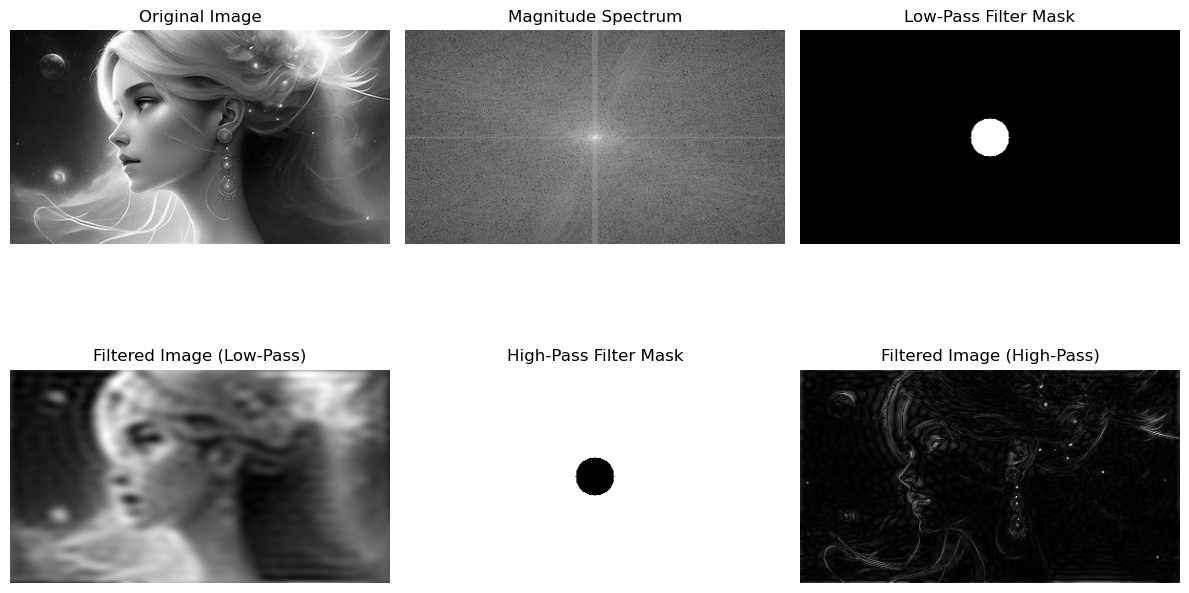

In [1]:
# Import necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the image in grayscale
image = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error: Image not found or failed to load.")
else:
    # Perform 2D Fourier Transform and shift
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2  # Center of the image

    # Create a mask for low-pass filter (circular mask, keeping low frequencies)
    mask_low = np.zeros((rows, cols), np.uint8)
    radius = 20  # Set the radius for the low-pass filter
    cv2.circle(mask_low, (ccol, crow), radius, 1, thickness=-1)

    # Create a mask for high-pass filter (circular mask, blocking low frequencies)
    mask_high = np.ones((rows, cols), np.uint8)
    cv2.circle(mask_high, (ccol, crow), radius, 0, thickness=-1)

    # Apply the low-pass filter on the shifted Fourier transformed image
    f_shift_low = f_shift * mask_low

    # Apply the high-pass filter on the shifted Fourier transformed image
    f_shift_high = f_shift * mask_high

    # Inverse shift and inverse Fourier transform to get the filtered image (low-pass)
    f_ishift_low = np.fft.ifftshift(f_shift_low)
    img_low_pass = np.fft.ifft2(f_ishift_low)
    img_low_pass = np.abs(img_low_pass)

    # Inverse shift and inverse Fourier transform to get the filtered image (high-pass)
    f_ishift_high = np.fft.ifftshift(f_shift_high)
    img_high_pass = np.fft.ifft2(f_ishift_high)
    img_high_pass = np.abs(img_high_pass)

    # Display the results
    plt.figure(figsize=(12, 8))

    # Show original image
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Show magnitude spectrum of original image
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))
    plt.subplot(2, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')

    # Show low-pass filter mask
    plt.subplot(2, 3, 3)
    plt.imshow(mask_low, cmap='gray')
    plt.title('Low-Pass Filter Mask')
    plt.axis('off')

    # Show filtered image (low-pass filter applied)
    plt.subplot(2, 3, 4)
    plt.imshow(img_low_pass, cmap='gray')
    plt.title('Filtered Image (Low-Pass)')
    plt.axis('off')

    # Show high-pass filter mask
    plt.subplot(2, 3, 5)
    plt.imshow(mask_high, cmap='gray')
    plt.title('High-Pass Filter Mask')
    plt.axis('off')

    # Show filtered image (high-pass filter applied)
    plt.subplot(2, 3, 6)
    plt.imshow(img_high_pass, cmap='gray')
    plt.title('Filtered Image (High-Pass)')
    plt.axis('off')

    # Display all the plots
    plt.tight_layout()
    plt.show()


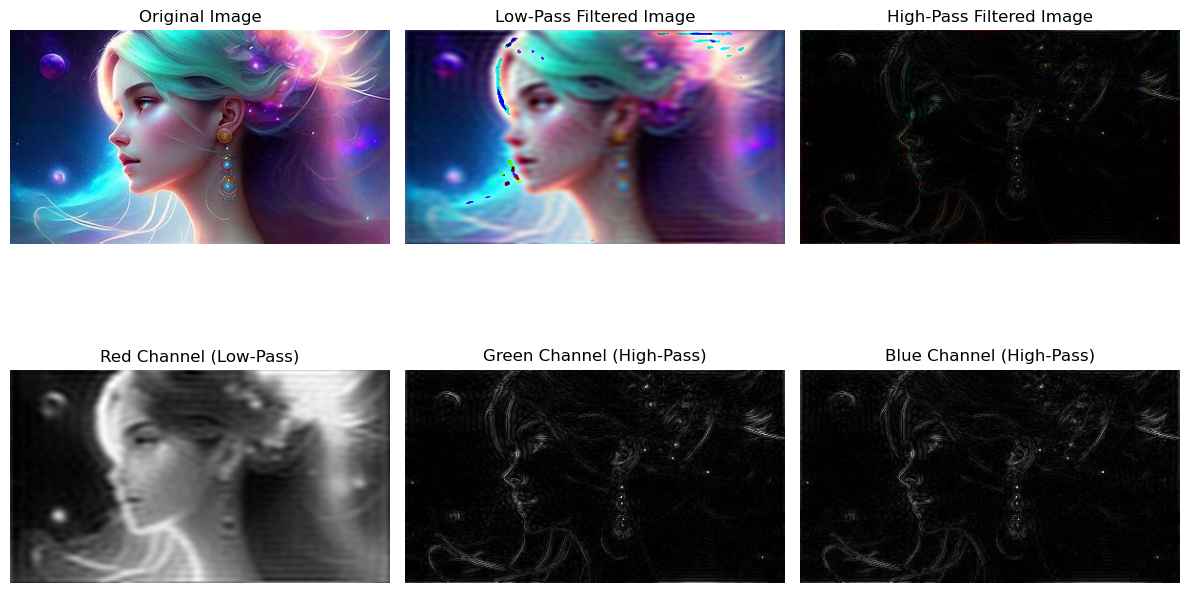

In [14]:
# Import necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the color image
image = cv2.imread('image.jpeg')

# Check if the image is loaded properly
if image is None:
    print("Error: Image not found or failed to load.")
else:
    # Convert the image from BGR (OpenCV default) to RGB for better visualization
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split the image into Red, Green, and Blue channels
    r_channel, g_channel, b_channel = cv2.split(image)

    # Function to perform filtering on each channel
    def apply_filter(channel, filter_type='low', radius=30):
        """Applies low-pass or high-pass filter on a single channel."""
        # Perform 2D Fourier Transform and shift
        f_transform = np.fft.fft2(channel)
        f_shift = np.fft.fftshift(f_transform)

        # Get image dimensions
        rows, cols = channel.shape
        crow, ccol = rows // 2, cols // 2  # Center of the image

        # Create mask (low-pass or high-pass)
        if filter_type == 'low':
            # Low-pass filter: Circular mask allowing low frequencies
            mask = np.zeros((rows, cols), np.uint8)
            cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)
        elif filter_type == 'high':
            # High-pass filter: Circular mask blocking low frequencies
            mask = np.ones((rows, cols), np.uint8)
            cv2.circle(mask, (ccol, crow), radius, 0, thickness=-1)

        # Apply the filter mask
        f_shift_filtered = f_shift * mask

        # Inverse shift and inverse Fourier transform
        f_ishift = np.fft.ifftshift(f_shift_filtered)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        
        return img_back

    # Apply low-pass filter on each channel
    r_low_pass = apply_filter(r_channel, filter_type='low', radius=30)
    g_low_pass = apply_filter(g_channel, filter_type='low', radius=30)
    b_low_pass = apply_filter(b_channel, filter_type='low', radius=30)

    # Apply high-pass filter on each channel
    r_high_pass = apply_filter(r_channel, filter_type='high', radius=30)
    g_high_pass = apply_filter(g_channel, filter_type='high', radius=30)
    b_high_pass = apply_filter(b_channel, filter_type='high', radius=30)

    # Merge the low-pass filtered channels back into a color image
    img_low_pass = cv2.merge([r_low_pass, g_low_pass, b_low_pass])

    # Merge the high-pass filtered channels back into a color image
    img_high_pass = cv2.merge([r_high_pass, g_high_pass, b_high_pass])

    # Display the results
    plt.figure(figsize=(12, 8))

    # Show original image
    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    # Show low-pass filtered image
    plt.subplot(2, 3, 2)
    plt.imshow(img_low_pass.astype(np.uint8))
    plt.title('Low-Pass Filtered Image')
    plt.axis('off')

    # Show high-pass filtered image
    plt.subplot(2, 3, 3)
    plt.imshow(img_high_pass.astype(np.uint8))
    plt.title('High-Pass Filtered Image')
    plt.axis('off')

    # Show Red channel (Low-Pass)
    plt.subplot(2, 3, 4)
    plt.imshow(r_low_pass, cmap='gray')
    plt.title('Red Channel (Low-Pass)')
    plt.axis('off')

    # Show Green channel (High-Pass)
    plt.subplot(2, 3, 5)
    plt.imshow(g_high_pass, cmap='gray')
    plt.title('Green Channel (High-Pass)')
    plt.axis('off')

    # Show Blue channel (High-Pass)
    plt.subplot(2, 3, 6)
    plt.imshow(b_high_pass, cmap='gray')
    plt.title('Blue Channel (High-Pass)')
    plt.axis('off')

    # Display all the plots
    plt.tight_layout()
    plt.show()
